In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.cm as cm

In [2]:
# Load the dataset
df = pd.read_csv("country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

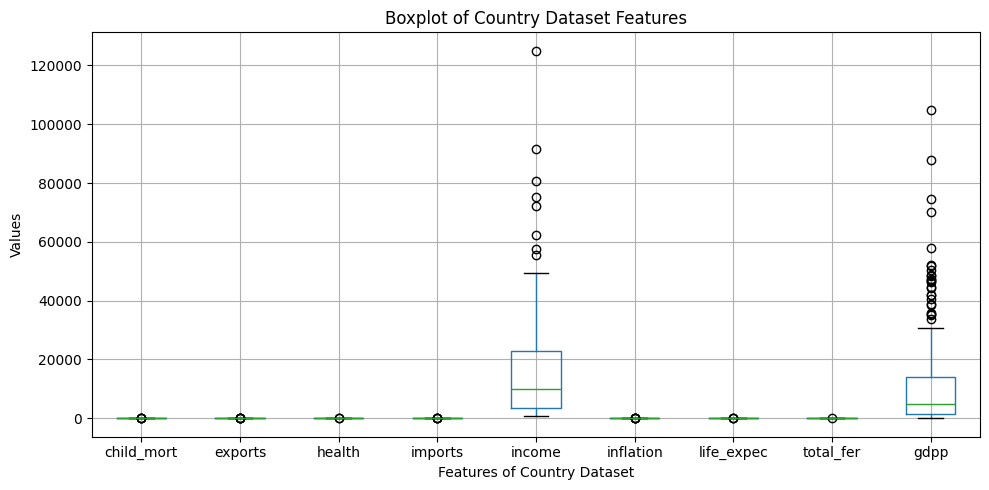

In [7]:
# Boxplot of the dataset to spot outliers
df.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Country Dataset Features')
plt.xlabel('Features of Country Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

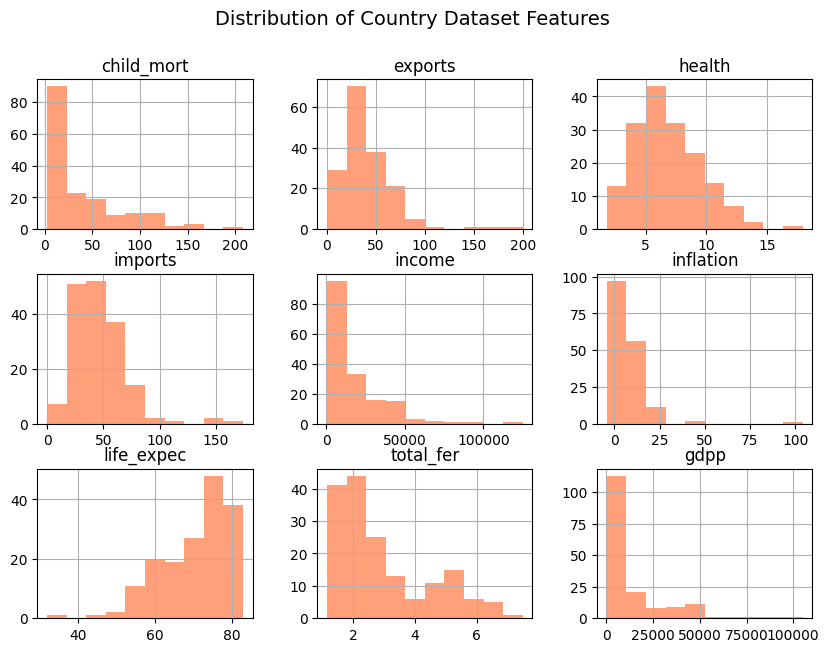

In [8]:
# Histogram of the dataset
df.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Country Dataset Features', fontsize=14)

plt.show()

In [9]:
# Feature clipping right skewed features
# Define list of right skewed featutres
features = ['gdpp', 'income', 'child_mort', 'exports', 'imports', 'inflation']

# Feature clip
for feature in features:
    lower_limit, upper_limit = np.percentile(df[feature], [1,95])
    df[feature] = np.clip(df[feature], lower_limit, upper_limit)

# Feature clipping left skewed features
lower_limit, upper_limit = np.percentile(df['life_expec'], [5,100])
df['life_expec'] = np.clip(df['life_expec'], lower_limit, upper_limit)

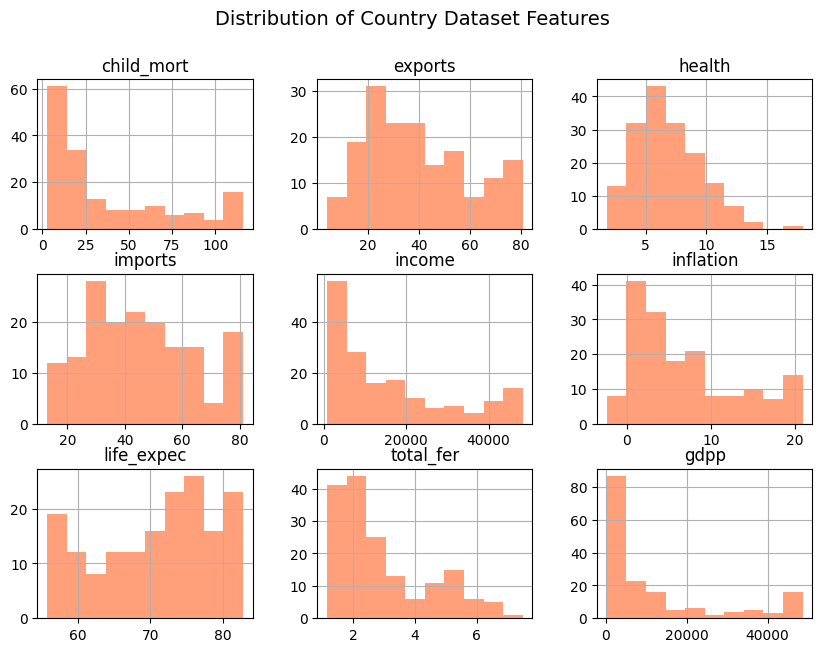

In [10]:
# Histogram of the dataset
df.hist(bins=10, color='#FFA07A', figsize=(10,7))

# Add title
plt.suptitle('Distribution of Country Dataset Features', fontsize=14)

plt.show()

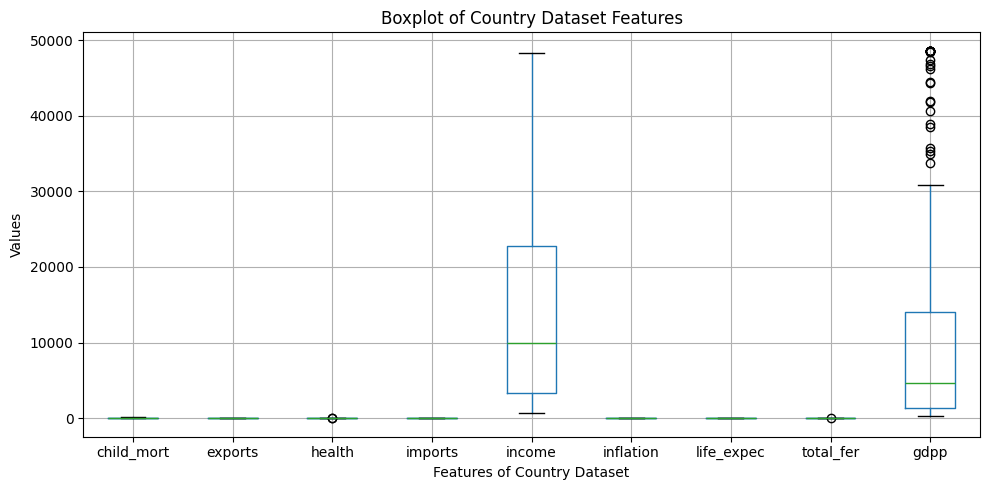

In [11]:
# Boxplot of the dataset to spot outliers
df.boxplot(figsize=(10,5))

# Add title and labels
plt.title('Boxplot of Country Dataset Features')
plt.xlabel('Features of Country Dataset')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

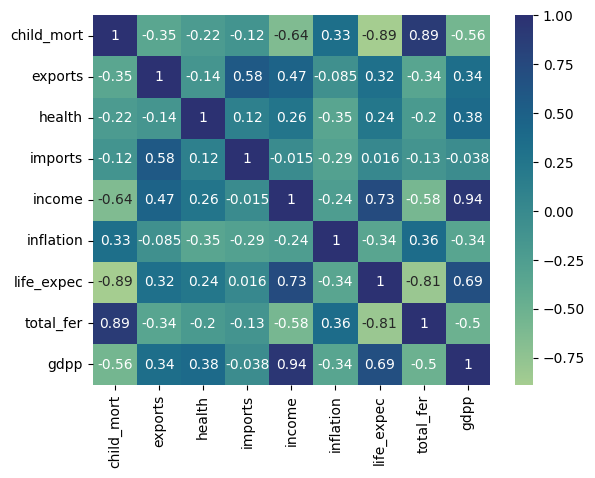

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')
plt.show()

In [13]:
# Scale the features
features = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
# Finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

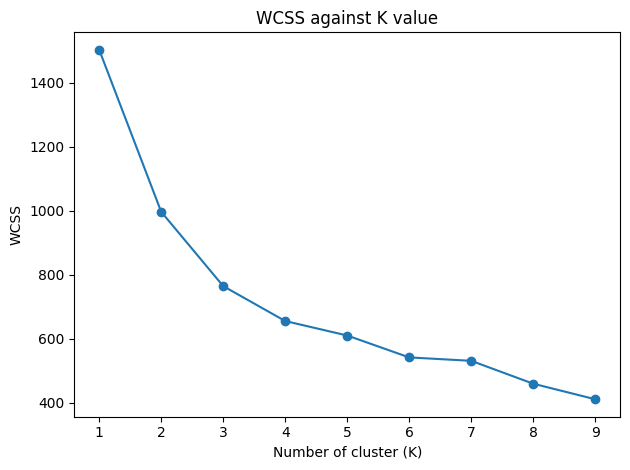

In [15]:
# plot
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of cluster (K)')
plt.ylabel('WCSS')
plt.title('WCSS against K value')
plt.tight_layout()
plt.show()

For n_clusters = 2, average silhouette score = 0.284


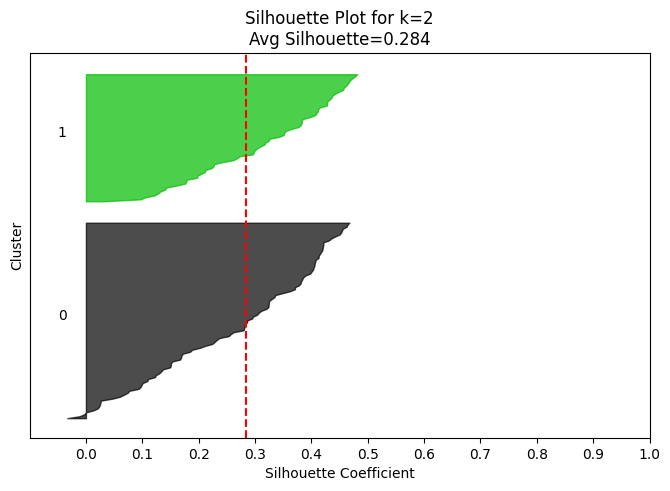

For n_clusters = 3, average silhouette score = 0.273


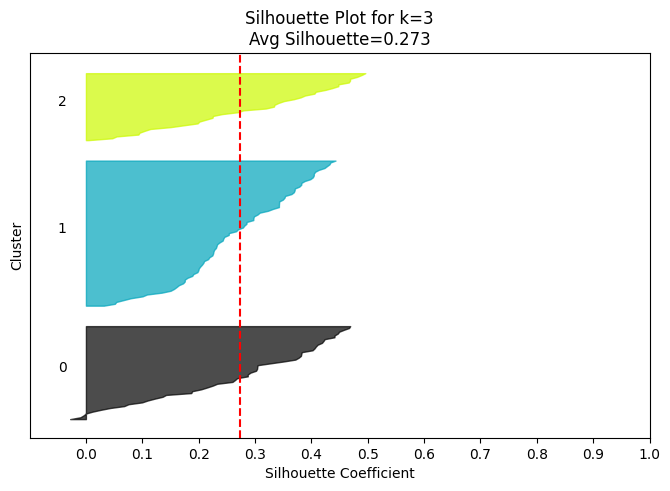

For n_clusters = 4, average silhouette score = 0.268


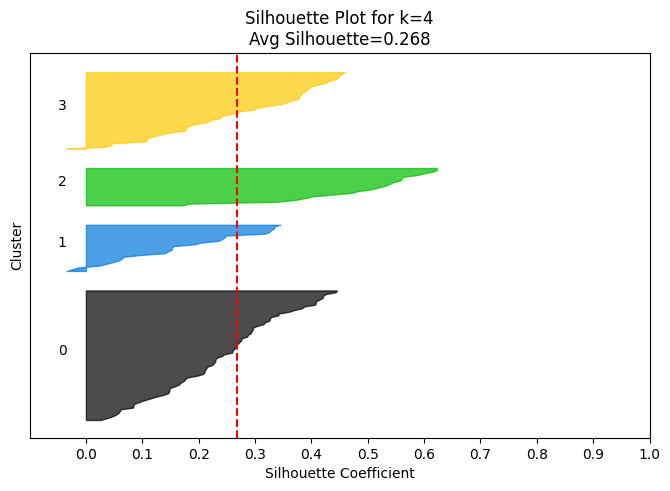

For n_clusters = 5, average silhouette score = 0.258


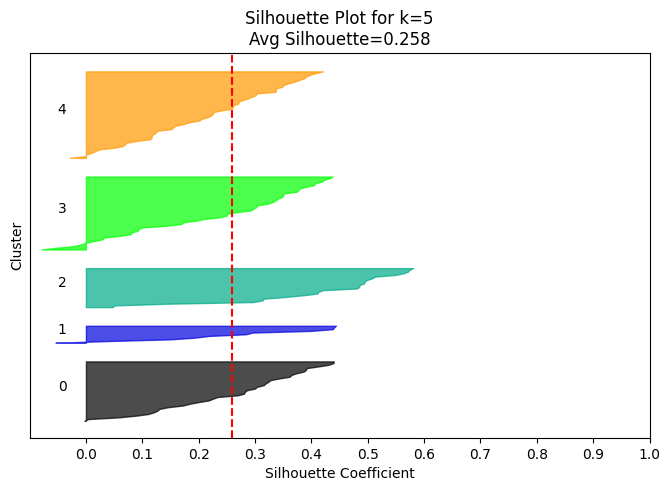

For n_clusters = 6, average silhouette score = 0.250


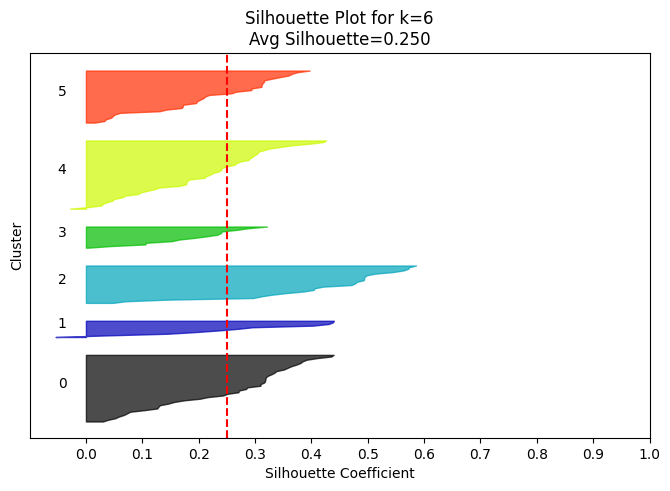

In [16]:
# Visualise Silhoutte scores to to see how well balanced they are
# Silhoutte score of closer to 1 is better

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialise the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)
    
    # Average silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, average silhouette score = {silhouette_avg:.3f}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)
    
    # Create a subplot for silhouette
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)
    
    # The silhouette coefficient range 
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )
        
        # Label the silhouette plots with their cluster number at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute new y_lower for next cluster
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Visualise silhouette score for each K value
    ax1.set_title(f"Silhouette Plot for k={n_clusters}\nAvg Silhouette={silhouette_avg:.3f}")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster")
    
    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Clear the y-axis labels
    ax1.set_yticks([])  
    ax1.set_xticks([i/10 for i in range(0, 11)])
    
    plt.show()
    



In [17]:
## dimensionality reduction
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_features)

In [18]:
# Use the cluster to be 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(reduced_data)
y_predicted

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [19]:
# put the cluster into the dataframe
df['Cluster'] = y_predicted

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.20,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.30,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.50,2.89,4460.0,2
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.10,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.80,2.13,12200.0,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.00,3.50,2970.0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,20.87,75.40,2.47,13500.0,2
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.10,1.95,1310.0,2
165,Yemen,56.3,30.0,5.18,34.4,4480.0,20.87,67.50,4.67,1310.0,1


In [20]:
# centroid
km.cluster_centers_

array([[ 2.50177607, -0.25183992,  0.2195321 ],
       [-2.64824   , -0.2039461 ,  0.35987626],
       [-0.08219449,  0.30235515, -0.37737551]])

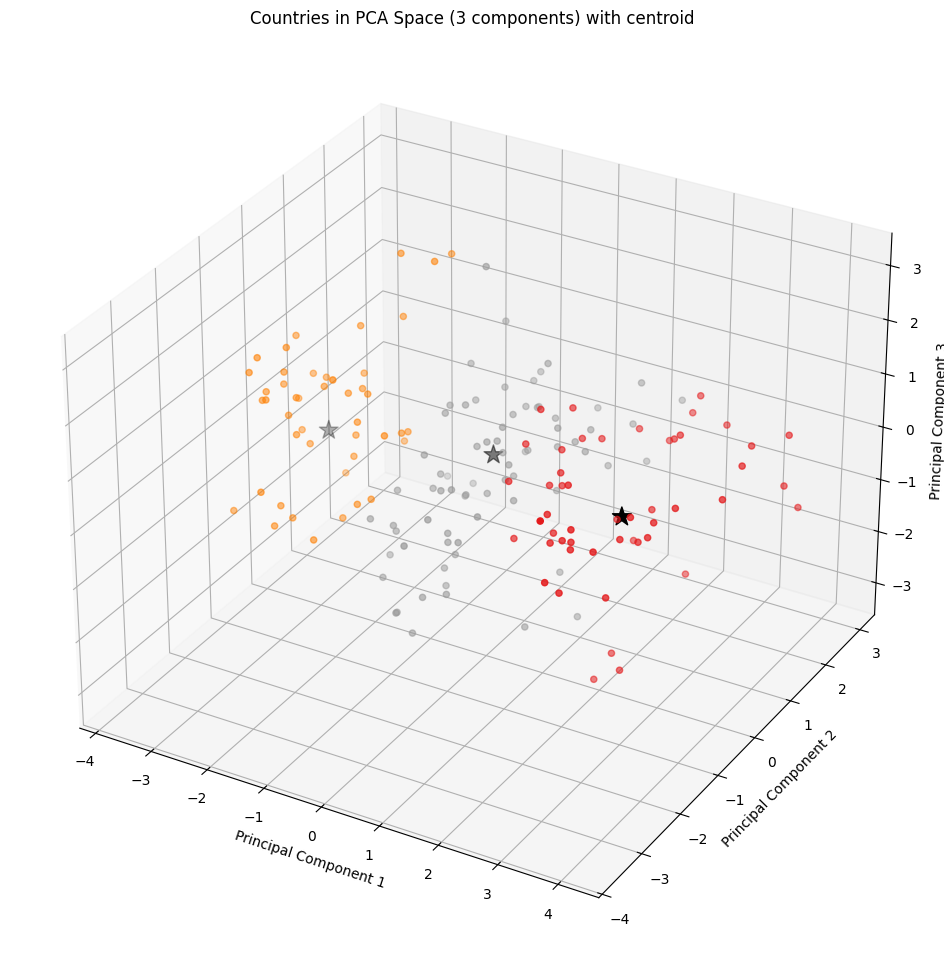

In [21]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot in 3D
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=df["Cluster"], cmap="Set1", label='Clusters')

#Plot centroids
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker='*', s=200, label = 'Centroids')

# Add title and labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title("Countries in PCA Space (3 components) with centroid")



plt.show()

In [22]:
# Statistics summary per cluster
numeric_cols = df.select_dtypes(include="number").columns
cluster_summary = df.groupby("Cluster")[numeric_cols].agg(["mean", "median", "min", "max"])
print(cluster_summary)

        child_mort                        exports                         \
              mean median   min    max       mean median      min    max   
Cluster                                                                    
0         5.892000   4.70   2.8   14.2  48.781000  44.25  12.4000  80.57   
1        87.995556  90.20  47.0  116.0  23.631307  22.20   3.9094  62.30   
2        26.234722  20.05   5.5  111.0  42.069167  40.50  10.7000  80.57   

           health         ... total_fer                gdpp                    \
             mean median  ...       min   max          mean   median      min   
Cluster                   ...                                                   
0        8.634800  9.030  ...      1.15  3.03  30727.000000  32250.0  4610.00   
1        6.301778  5.300  ...      2.41  7.49   1099.894222    738.0   331.62   
2        5.873611  5.605  ...      1.27  5.21   5806.444444   4520.0   758.00   

                 Cluster                 
             m

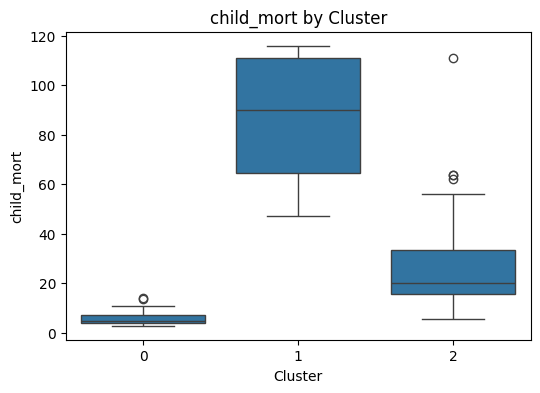

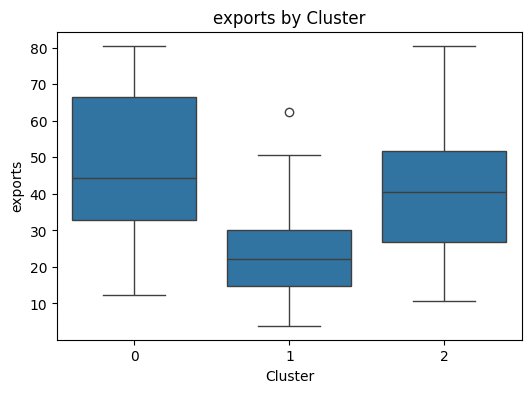

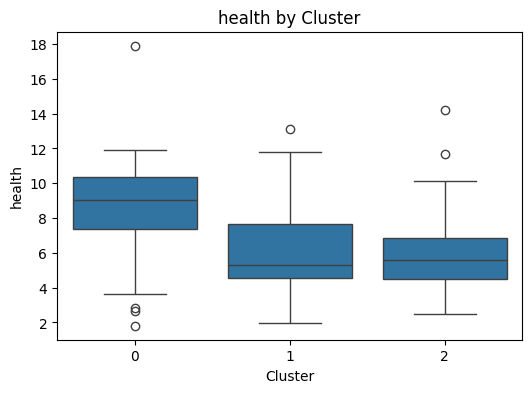

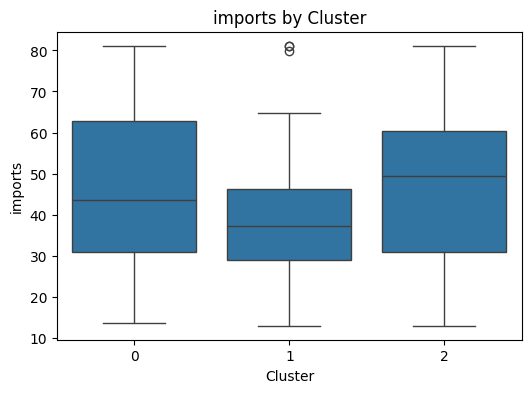

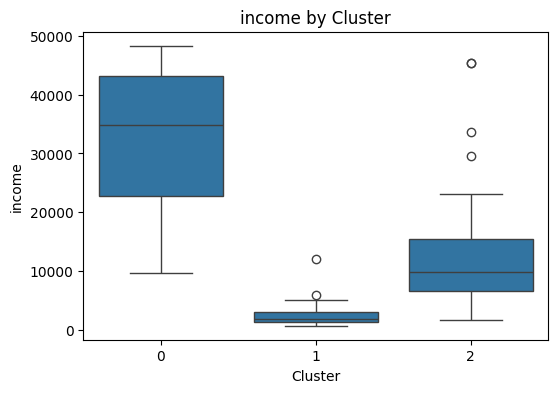

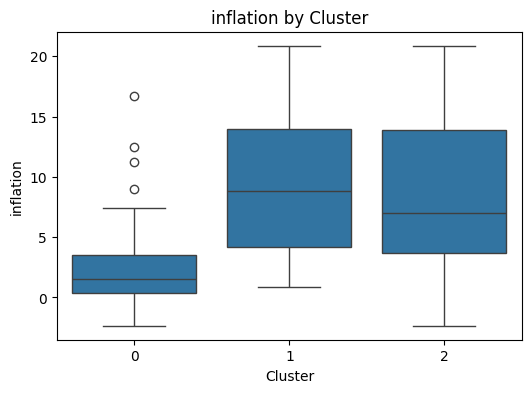

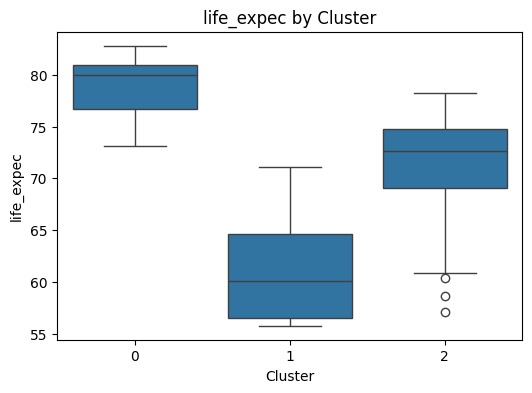

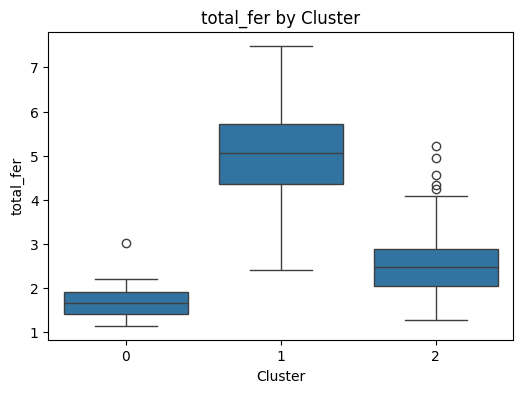

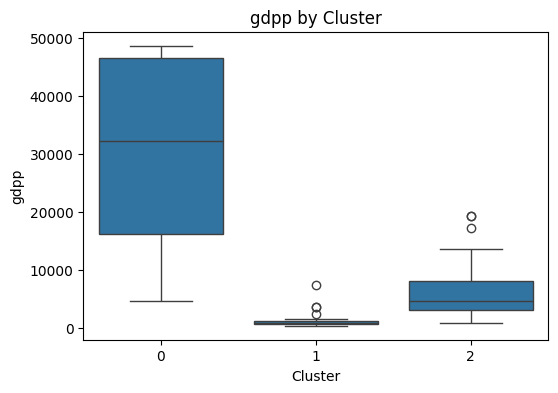

In [23]:
# Check the distribution of each Feature by cluster
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for feat in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Cluster", y=feat, data=df)
    plt.title(f"{feat} by Cluster")
    plt.show()

In [24]:
# Compare means side by side

# Extract means of each cluster
mean_values = df.groupby("Cluster")[['income', 'gdpp']].mean()
print(mean_values)
# Transpose - rows: features, columns = cluster
mean_value_transposed = mean_values.T
print(mean_value_transposed)

               income          gdpp
Cluster                            
0        33180.600000  30727.000000
1         2421.077333   1099.894222
2        11952.361111   5806.444444
Cluster        0            1             2
income   33180.6  2421.077333  11952.361111
gdpp     30727.0  1099.894222   5806.444444


In [25]:
# Compare means side by side

# Extract means of each cluster
mean_values2 = df.groupby("Cluster")[['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer']].mean()
print(mean_values2)
# Transpose - rows: features, columns = cluster
mean_value_transposed2 = mean_values2.T
print(mean_value_transposed2)


         child_mort    exports    health    imports  inflation  life_expec  \
Cluster                                                                      
0          5.892000  48.781000  8.634800  47.005200   2.594624   79.034000   
1         87.995556  23.631307  6.301778  40.319289   9.427667   60.822667   
2         26.234722  42.069167  5.873611  47.075111   8.416003   71.465278   

         total_fer  
Cluster             
0         1.708400  
1         4.916222  
2         2.578611  
Cluster             0          1          2
child_mort   5.892000  87.995556  26.234722
exports     48.781000  23.631307  42.069167
health       8.634800   6.301778   5.873611
imports     47.005200  40.319289  47.075111
inflation    2.594624   9.427667   8.416003
life_expec  79.034000  60.822667  71.465278
total_fer    1.708400   4.916222   2.578611


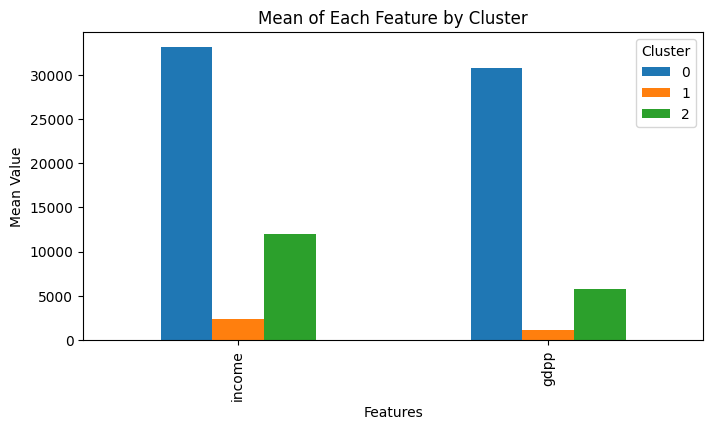

In [26]:
# plot tranposed 
mean_value_transposed.plot.bar(figsize=(8,4))
plt.title("Mean of Each Feature by Cluster")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.show()

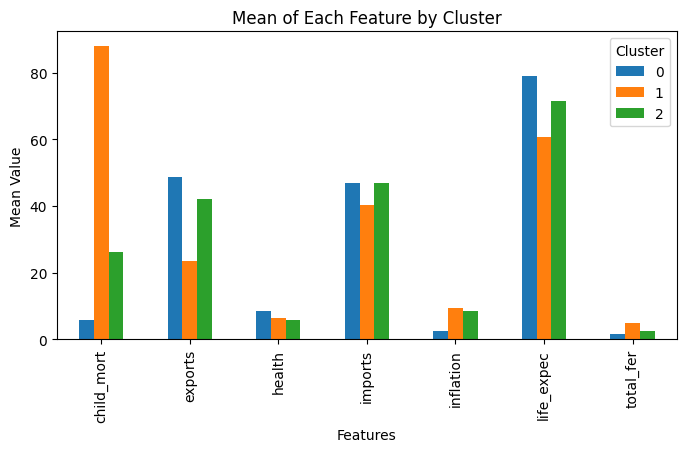

In [27]:
# plot tranposed 
mean_value_transposed2.plot.bar(figsize=(8,4))
plt.title("Mean of Each Feature by Cluster")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.show()

In [28]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.20,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.30,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.50,2.89,4460.0,2
3,Angola,116.0,62.3,2.85,42.9,5900.0,20.87,60.10,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.80,2.13,12200.0,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.00,3.50,2970.0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,20.87,75.40,2.47,13500.0,2
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.10,1.95,1310.0,2
165,Yemen,56.3,30.0,5.18,34.4,4480.0,20.87,67.50,4.67,1310.0,1


In [29]:
# Filter countries in Cluster 1
cluster_1_countries = df[df["Cluster"] == 1]["country"]

cluster_1_countries

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107                     Myanmar
109                       Nepal
112                       Niger
113     

In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
print(df[df["Cluster"] == 1]["country"].unique())

['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 "Cote d'Ivoire" 'Eritrea' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Haiti' 'India' 'Kenya' 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Myanmar' 'Nepal' 'Niger'
 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa'
 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen'
 'Zambia']


In [32]:
# Cluster 1 df
cluster_1_df = df[df["Cluster"] == 1].reset_index(drop=True)
cluster_1_df= cluster_1_df.drop(columns='Cluster')
cluster_1_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0000,7.58,44.900,1610.00,9.440,56.20,5.82,553.00
1,Angola,116.0,62.3000,2.85,42.900,5900.00,20.870,60.10,6.16,3530.00
2,Benin,111.0,23.8000,4.10,37.200,1820.00,0.885,61.80,5.36,758.00
3,Burkina Faso,116.0,19.2000,6.74,29.600,1430.00,6.810,57.90,5.87,575.00
4,Burundi,93.6,8.9200,11.60,39.200,764.00,12.300,57.70,6.26,331.62
5,Cameroon,108.0,22.2000,5.13,27.000,2660.00,1.910,57.30,5.11,1310.00
6,Central African Republic,116.0,11.8000,3.98,26.500,888.00,2.010,55.78,5.21,446.00
7,Chad,116.0,36.8000,4.53,43.500,1930.00,6.390,56.50,6.59,897.00
8,Comoros,88.2,16.5000,4.51,51.700,1410.00,3.870,65.90,4.75,769.00
9,"Congo, Dem. Rep.",116.0,41.1000,7.91,49.600,742.24,20.800,57.50,6.54,334.00


In [33]:
# Normalize and rank compound scores (higher score = more need for aid)

cluster_1_df['aid_score'] = (
    cluster_1_df['child_mort'].rank(ascending=False) +  # Higher child mortality means more aid needed
    cluster_1_df['gdpp'].rank(ascending=True) +  # Lower GDP per capita means more aid needed
    cluster_1_df['income'].rank(ascending=True) +  # Lower income means more aid needed
    cluster_1_df['life_expec'].rank(ascending=True) +  # Lower life expectancy means more aid needed
    cluster_1_df['health'].rank(ascending=True) +  # Lower health expenditure means more aid needed
    cluster_1_df['inflation'].rank(ascending=False)  # Higher inflation means more aid needed
)

cluster_1_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,aid_score
0,Afghanistan,90.2,10.0000,7.58,44.900,1610.00,9.440,56.20,5.82,553.00,117.0
1,Angola,116.0,62.3000,2.85,42.900,5900.00,20.870,60.10,6.16,3530.00,122.0
2,Benin,111.0,23.8000,4.10,37.200,1820.00,0.885,61.80,5.36,758.00,140.5
3,Burkina Faso,116.0,19.2000,6.74,29.600,1430.00,6.810,57.90,5.87,575.00,111.5
4,Burundi,93.6,8.9200,11.60,39.200,764.00,12.300,57.70,6.26,331.62,96.5
5,Cameroon,108.0,22.2000,5.13,27.000,2660.00,1.910,57.30,5.11,1310.00,155.0
6,Central African Republic,116.0,11.8000,3.98,26.500,888.00,2.010,55.78,5.21,446.00,69.5
7,Chad,116.0,36.8000,4.53,43.500,1930.00,6.390,56.50,6.59,897.00,107.5
8,Comoros,88.2,16.5000,4.51,51.700,1410.00,3.870,65.90,4.75,769.00,147.0
9,"Congo, Dem. Rep.",116.0,41.1000,7.91,49.600,742.24,20.800,57.50,6.54,334.00,65.0


In [34]:
# Sort by aid score (higher score means more aid needed)
df_sorted = cluster_1_df.sort_values(by='aid_score', ascending=False)

# Display top 3 countries in need of aid
df_sorted[['country', 'aid_score']].head(3)

,country,aid_score
19,Kiribati,208.0
36,South Africa,203.0
40,Timor-Leste,190.5


In [36]:
cluster_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     45 non-null     object 
 1   child_mort  45 non-null     float64
 2   exports     45 non-null     float64
 3   health      45 non-null     float64
 4   imports     45 non-null     float64
 5   income      45 non-null     float64
 6   inflation   45 non-null     float64
 7   life_expec  45 non-null     float64
 8   total_fer   45 non-null     float64
 9   gdpp        45 non-null     float64
 10  aid_score   45 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.0+ KB


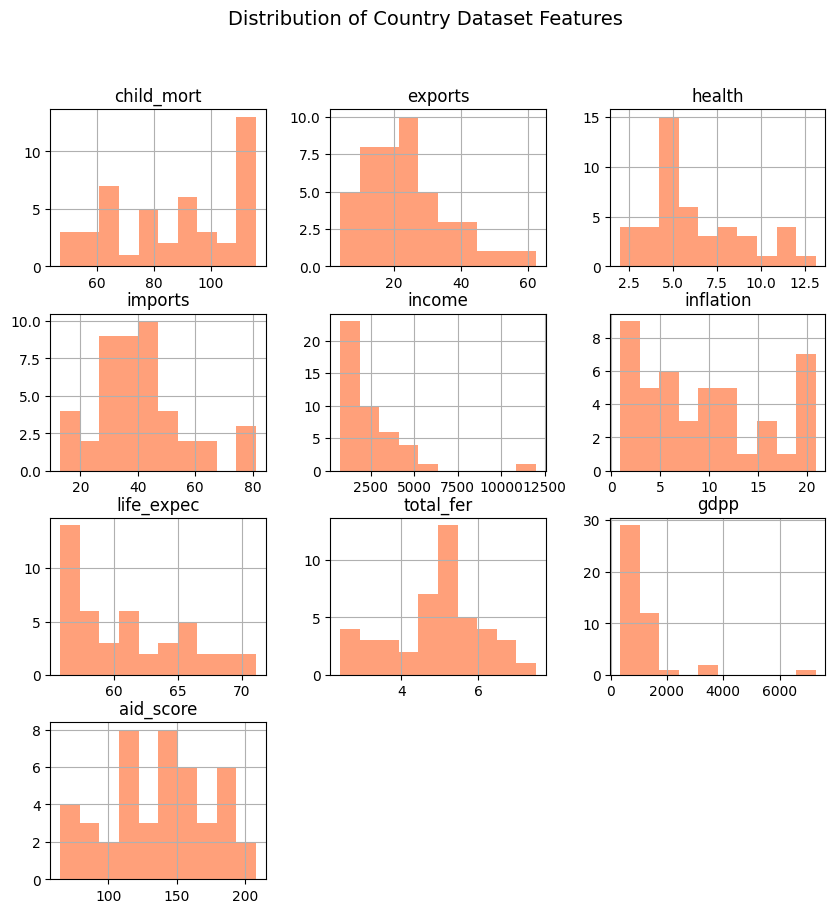

In [37]:
# Histogram of the dataset
cluster_1_df.hist(bins=10, color='#FFA07A', figsize=(10,10))

# Add title
plt.suptitle('Distribution of Country Dataset Features', fontsize=14)

plt.show()

Hierartical Cluster of Cluster 1

In [38]:
# standardising the data
features1 = cluster_1_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
data_norm = normalize(features1)
data_norm = pd.DataFrame(data_norm, columns=features1.columns)
data_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.016868,0.009059,0.000414,0.006238,0.857923,0.003035,0.008739,0.000896,0.513300
2,0.056170,0.012044,0.002075,0.018825,0.920991,0.000448,0.031273,0.002712,0.383577
3,0.074976,0.012410,0.004356,0.019132,0.924274,0.004402,0.037423,0.003794,0.371649
4,0.111263,0.010603,0.013789,0.046597,0.908174,0.014621,0.068589,0.007441,0.394200


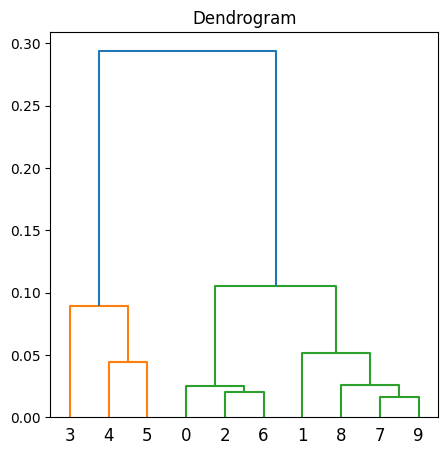

In [39]:
# dendrogram to find the number of clusters
subset_data = data_norm.sample(n=10)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(subset_data, method='ward'))
plt.show()

In [40]:
# Using sillhoute score to determine the k value

sil_score = []
k_range = range(2, 11)

for k in k_range:
    cluster = AgglomerativeClustering(n_clusters=k, metric= 'euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(data_norm)


    score = silhouette_score(data_norm, cluster_labels)
    sil_score.append(score)
    print(f'Sillohte score for k={k}: {score}')

Sillohte score for k=2: 0.8053717230115298
Sillohte score for k=3: 0.365069066580506
Sillohte score for k=4: 0.362455440209431
Sillohte score for k=5: 0.3616862085602356
Sillohte score for k=6: 0.34287157190932066
Sillohte score for k=7: 0.36723219560391074
Sillohte score for k=8: 0.3976803049364812
Sillohte score for k=9: 0.3897421229621703
Sillohte score for k=10: 0.3736400005035456


In [41]:
# dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_norm)

In [42]:
# agglomerative clustering
clus = AgglomerativeClustering(n_clusters=2, metric= 'euclidean', linkage='ward')
now = clus.fit_predict(reduced_data)

In [43]:
now

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

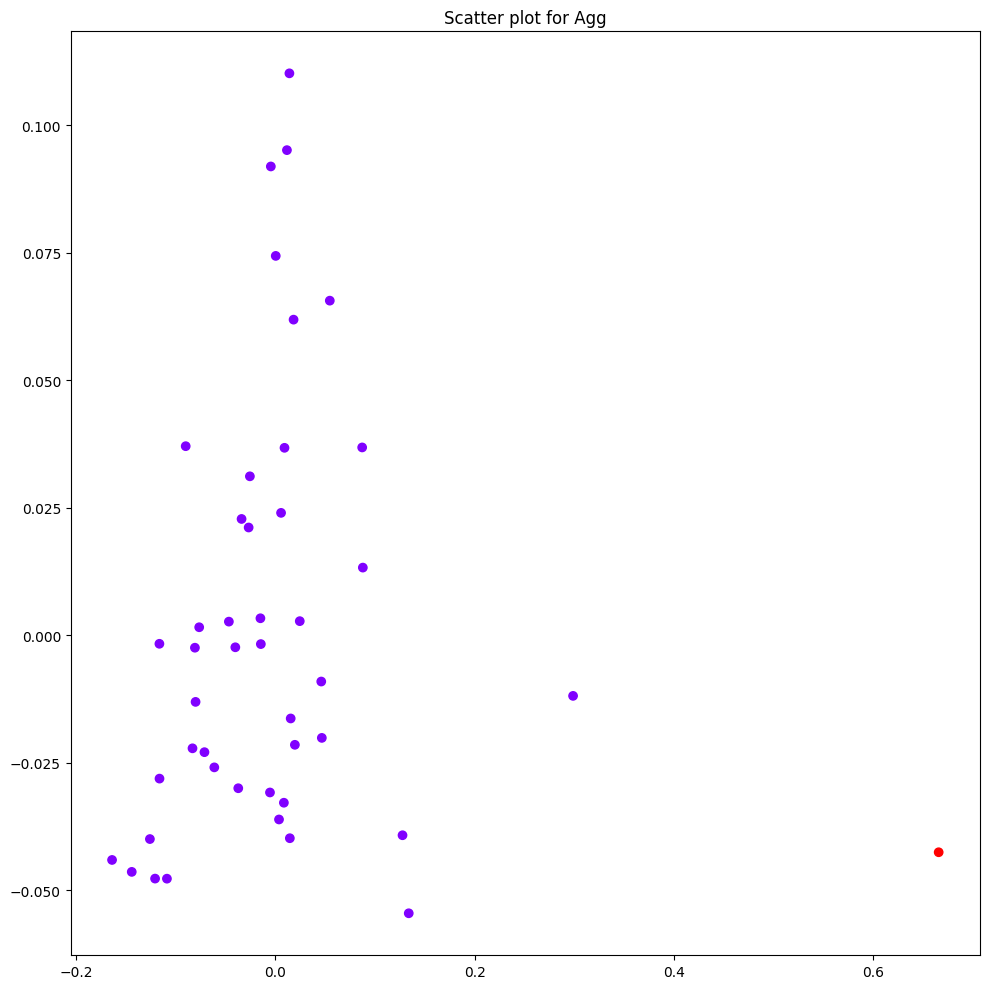

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=now, cmap='rainbow')
plt.title('Scatter plot for Agg')
plt.tight_layout()
plt.show()

In [45]:
reduced_data

array([[-7.66187090e-02,  1.53705296e-03],
       [ 1.27621646e-01, -3.92542095e-02],
       [-1.51166608e-02,  3.29793784e-03],
       [-2.69484744e-02,  2.10994069e-02],
       [ 2.79614832e-04,  7.43636600e-02],
       [ 4.65717693e-02, -2.01608945e-02],
       [ 5.45764725e-02,  6.55864243e-02],
       [ 2.44055273e-02,  2.73426554e-03],
       [ 8.77665099e-02,  1.32349217e-02],
       [ 1.39987833e-02,  1.10167969e-01],
       [ 1.52905877e-02, -1.63515578e-02],
       [-8.02522738e-02, -1.31002190e-02],
       [-8.09076118e-02, -2.47511551e-03],
       [-5.51568269e-03, -3.08649766e-02],
       [ 8.70915518e-02,  3.68002894e-02],
       [-3.40569672e-02,  2.27743646e-02],
       [ 5.60858085e-03,  2.39688739e-02],
       [-1.09028792e-01, -4.77705083e-02],
       [-3.73709754e-02, -3.00333520e-02],
       [ 2.98943255e-01, -1.19219102e-02],
       [-1.26134047e-01, -3.99990727e-02],
       [ 4.59901578e-02, -9.10771316e-03],
       [ 1.15187819e-02,  9.51071051e-02],
       [-1.